In [1]:
'''On day 3, we ended by constructing a DataFrame class that formalizes the dataset with an append_column and 
create_scatterplot method. We can add even more functionality to show why we might prefer this to a dictionary.'''

# recall our DataFrame class:
class DataFrame():  
    '''This formalizes a dictionary, whose keys are variable names and whose values are lists of data.
    We don't yet know everything we'll want to do with a dataset dictionary, so it's safe to create a class that
    future-proofs us.'''
    
    # 'self' shows up a lot; don't worry about it for now
    def __init__(self):  # this is the DataFrame class' initialization "method" (method = function, for a class)
        self.dataset = {}
    
    def append_column(self, list_of_data, column_name):
        '''Accepts a list of data to pass in to the dataset with the associated column_name.'''
        # check arguments
        # 1.) verify that the list_of_data is of the correct type (just like for SE)
        self.verify_datatype(list_of_data)
            
        # main functionality
        self.dataset.update({column_name: list_of_data})
        
    def verify_datatype(self, list_of_data):
        '''Ensures the list_of_data being passed in is in 'proper' format (just like for our SE function).'''
        if not isinstance(list_of_data,list):
            raise TypeError('list_of_data must be a list.')
        for x_i in list_of_data:
            if not (isinstance(x_i,int) or isinstance(x_i,float)):
                raise TypeError('Element \'{x_i}\' of list_of_data needs to be of class <int> or <float>. Type {type_xi} is not allowed.'.format(x_i=x_i,type_xi=type(x_i)))
        if len(list_of_data)<=1:
            raise ValueError('list_of_data cannot be < len 2.')
            
    def create_scatterplot(self, list_1, list_2):
        X_data = self.dataset[list_1]
        y_data = self.dataset[list_2]
        sns.scatterplot(X_data, y_data)

In [2]:
# one thing to worry about if we were just using built-in dictionaries is that dictionary keys must be unique, but Python won't
# warn you if you're about to overwrite an existing key. It isn't an error; you're just silently overwriting old data. You can
# imagine many scenarios where this is undesirable, and where it would be preferred if we could raise an error or warning
# if we're about to overwrite old data.

test_dataset = {'y': 50, 'x': 37}
print(test_dataset)
test_dataset.update({'x_2': 15})  # no issues here; we're just adding another key:value pair to the dictionary
print(test_dataset)
test_dataset.update({'x_2': 13})  # problem! this key already exists in test_dataset; but we won't see an error / warning
print(test_dataset)  # it will just silently update the existing key:value pair

{'y': 50, 'x': 37}
{'y': 50, 'x': 37, 'x_2': 15}
{'y': 50, 'x': 37, 'x_2': 13}


In [3]:
# also note that the built-in 'dictionary' is actually its own class, with its own methods!
help(dict)

Help on class dict in module builtins:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |  

In [4]:
# one of these methods is very useful for us now & later: the dict.keys() method. it will show us all of the keys in the dict
test_dataset.keys()

dict_keys(['y', 'x', 'x_2'])

In [6]:
# the documentation says dict_keys is a set-like object, so we can iterate through it:
for i in test_dataset.keys():
    print(i)

y
x
x_2


In [8]:
# and we can also test whether a key already exists in the dictionary:
print('x in test_dataset.keys()?', ('x' in test_dataset.keys()))
print('x_3 in test_dataset.keys()?', ('x_3' in test_dataset.keys()))

x in test_dataset.keys()? True
x_3 in test_dataset.keys()? False


In [9]:
# the dataset attribute that we defined for our DataFrame class is a dictionary, which means it -inherits- all of a dictionary's
# functionality, including its methods. So, we can use the .keys() method to raise a warning / error if the key already exists,
# i.e. if we already have a variable with that varname

# let's field-test this desired function before we add it to our DataFrame class:
list_of_data = [1,2,3]
column_name = 'test_column'
test_dataset = {'y': [0,0,0], 'x': [0,0,0]}

# we can update the test_dataset with our new 'column' of data, but we want to first check to make sure the 'test_column' key
# is not already present
if column_name in test_dataset.keys():
    raise KeyError('column_name {column_name} already exists in dataset.'.format(column_name=column_name))
else:
    test_dataset.update({column_name: list_of_data})

In [83]:
# running the if-else block again should raise a NameError:
if column_name in test_dataset.keys():
    raise NameError('column_name {column_name} already exists in dataset.'.format(column_name=column_name))
else:
    test_dataset.update({column_name: list_of_data})

NameError: column_name test_column already exists in dataset.

In [11]:
# so now we can protect our dataset against being overwritten. Let's add that functionality as part of our append_column method:
class DataFrame():  
    '''This formalizes a dictionary, whose keys are variable names and whose values are lists of data.
    We don't yet know everything we'll want to do with a dataset dictionary, so it's safe to create a class that
    future-proofs us.'''
    
    # 'self' shows up a lot; don't worry about it for now
    def __init__(self):  # this is the DataFrame class' initialization "method" (method = function, for a class)
        self.dataset = {}
    
    def append_column(self, list_of_data, column_name):
        '''Accepts a list of data to pass in to the dataset with the associated column_name.'''
        # check arguments
        # 1.) verify that the list_of_data is of the correct type (just like for SE)
        self.verify_datatype(list_of_data)
        
        ### NEW ARGUMENT TEST! ###
        # 2.) -prevent- the user from appending the column of data if the column_name is already in use in dataset
        if column_name in self.dataset.keys():
            raise NameError('column_name \'{column_name}\' already exists in dataset.'.format(column_name=column_name))
        ### NEW ARGUMENT TEST! ###
        
        # main functionality
        self.dataset.update({column_name: list_of_data})
        
    def verify_datatype(self, list_of_data):
        '''Ensures the list_of_data being passed in is in 'proper' format (just like for our SE function).'''
        if not isinstance(list_of_data,list):
            raise TypeError('list_of_data must be a list.')
        for x_i in list_of_data:
            if not (isinstance(x_i,int) or isinstance(x_i,float)):
                raise TypeError('Element \'{x_i}\' of list_of_data needs to be of class <int> or <float>. Type {type_xi} is not allowed.'.format(x_i=x_i,type_xi=type(x_i)))
        if len(list_of_data)<=1:
            raise ValueError('list_of_data cannot be < len 2.')
            
    def create_scatterplot(self, list_1, list_2):
        X_data = self.dataset[list_1]
        y_data = self.dataset[list_2]
        sns.scatterplot(X_data, y_data)

In [16]:
# finally, let's test out our DataFrame class' new functionality
# for generating our synthetic dataset, recall that we could iteratively generate random numbers using the 'random' module:
import random
random_integers = []
for i in range(0,10):
    random_integer = random.randint(0,3)
    random_integers.append(random_integer)
random_integers

[0, 3, 1, 2, 2, 3, 1, 2, 1, 1]

In [19]:
# we can actually squish this entire process into a single line using a 'list comprehension'
# list (and dict) comprehensions are very powerful for one reason: they're computationally quicker than for loops
random_integers = [random.randint(0,3) for n in range(0,10)]  # 'for every element in in [0,...,9], generate randint(0,3)'
random_integers

[0, 0, 1, 0, 1, 3, 1, 0, 3, 3]

In [37]:
# to prove that it's faster, let's time both approaches:
import time

start_time = time.time()
random_integers = []
for i in range(0,10000000):  # 10,000,000 observations
    random_integer = random.randint(0,3)
    random_integers.append(random_integer)
end_time = time.time()
print('Process completed in {t} seconds.'.format(t=str(end_time-start_time)))

Process completed in 7.757009029388428 seconds.


In [39]:
start_time = time.time()
random_integers = [random.randint(0,3) for n in range(0,10000000)]  # 10,000,000 observations
end_time = time.time()
print('Process completed in {t} seconds.'.format(t=str(end_time-start_time)))

Process completed in 6.89151406288147 seconds.


In [73]:
# let's use list comprehensions to generate a synthetic dataset. first, one additional function that will come in handy is zip()
# zip() lets us walk through two lists simultaneously
test_list1 = [1,2,3,4,5]
test_list2 = ['a','b','c','d']

for (i,j) in zip(test_list1,test_list2):
    print(i,j)  # note that it will stop after the end of the shortest list

1 a
2 b
3 c
4 d


In [74]:
error = [random.normalvariate(0,1) for n in range(0,1000)]
X = [random.normalvariate(0,1) for n in range(0,1000)]

# we can use zip() together with list comprehension functionality to define y using a one-liner
y = [2*x_i + error_i for (x_i,error_i) in zip(error,X)]

In [80]:
# there are no brownie points for writing one-liners, but simple list comprehensions are a good way to simplify the code.
df = DataFrame()  # creating an instance of our DataFrame object
# and now, let's append our columns
# two ways we can do this: if we state our arguments in the order they appear in the DataFrame's append_column method, it will
# automatically treat the arguments in the proper order. OR, we can be crystal clear and specify which arguments go with which
# data.
df.append_column(error, 'error')  # implicitly using our DataFrame class method's arguments
df.append_column(list_of_data=X, column_name='X')  # explicitly using them
# one perk to the second method is that it doesn't matter which order you list the arguments in. implicit has an issue with that:
df.append_column('y', y)  # it assumes we're trying to treat 'y' as our list_of_data, so it throws an error.

TypeError: list_of_data must be a list.

In [81]:
df.append_column(y, 'y')

In [82]:
# finally, let's test our new functionality: we should see a NameError if we try to append a column that already exists:
df.append_column(y, 'y')

NameError: column_name 'y' already exists in dataset.

In [86]:
# another powerful reason to use even our simple DataFrame class over a dictionary for this is that we can create multiple
# -instances- of the same class:

# generating a second DataFrame's fake data:
error2 = [random.normalvariate(0,1) for n in range(0,1000)]
X2 = [random.normalvariate(0,1) for n in range(0,1000)]
y2 = [2*x_i + error_i for (x_i,error_i) in zip(error2,X2)]

# instantiating the second DataFrame:
df2 = DataFrame()

# appending our new columns of data
# note: we can use the original variable name! That way, it's clear across multiple DataFrames that it's the same variable.
df2.append_column(error2, 'error')
df2.append_column(X2, 'X')
df2.append_column(y2, 'y')

C:\Users\Ethan\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


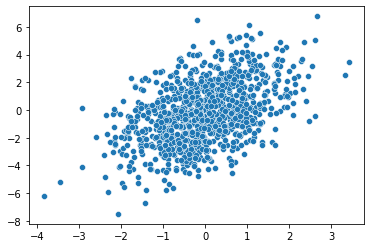

In [87]:
# testing it out
import seaborn as sns
df2.create_scatterplot('X','y')

C:\Users\Ethan\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


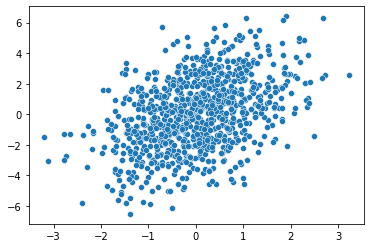

In [88]:
df.create_scatterplot('X','y')  # we've locked away two unique sets of data behind different instances of the same class!

In [90]:
# finally, wouldn't it be great if we could just start with our DataFrame already loaded with data? After all, we know exactly
# how to append_column(s); couldn't we just do that from the get-go and have the dataset loaded?
# the answer of course is yes. Let's quickly write functionality that allows us to plug in our data in the same moment that we
# create the DataFrame itself.

# to do this, we need to allow the user to pass an argument into instantiating the class itself. What we mean is this: consider
# a function that accepts -no arguments-, and just prints 'Here I am, without argument.':
def no_argument_function():
    print('Here I am, without argument.')
    
# to use this function, you pass in no arguments; simply call it:
no_arguments_function()

Here I am, without argument.


In [91]:
# if you try to pass in any arguments, it will get upset at you:
no_arguments_function(3)

TypeError: no_arguments_function() takes 0 positional arguments but 1 was given

In [96]:
# on the other hand, if we want the user to need to pass something in, we create an argument for the function:
def argument_function(print_message):
    if print_message==True:
        print('Here I am, only because print_message==True.')
        
argument_function(True)

Here I am, only because print_message==True.


In [94]:
# our function is inherently very flexible; if we pass in anything else it will do nothing:
argument_function(3)

In [95]:
# but what we -can't- do is pass in -nothing-; it expects -something- to take up the print_message argument:
argument_function()

TypeError: argument_function() missing 1 required positional argument: 'print_message'

In [99]:
# so here's the problem: if we allow the user to create a DataFrame -without- passing in the data as arguments at instantiation,
# we -can't- use said data at instantiation! On the other hand, if we -require- data to be passed in as an argument, then the
# user is no longer able to create an empty DataFrame. We want both to be okay (more flexibility. Nothing wrong with an empty
# DataFrame, after all.)

# the way to do this is to assign a -default value- to the argument:
def default_val_argument_function(print_message=True):
    if print_message==True:
        print('Here I am, only because print_message==True, or because you didn\'t define the argument, so I used the default val.')
        
default_val_argument_function(True)

Here I am, only because print_message==True, or because you didn't define the argument, so I used the default val.


In [100]:
# this lets us pass in nothing, in which case the default condition will hold:
default_val_argument_function()

Here I am, only because print_message==True, or because you didn't define the argument, so I used the default val.


In [104]:
# and we can of course still pass in other values for the argument:
default_val_argument_function([55])

In [8]:
# so, we are ready to allow the user to (optionally) pass data in when they create the instance
# since the 'dataset' attribute that comprises the focus of the DataFrame class is a dictionary, it makes sense to allow the
# user to pass in a dictionary
# so now we can protect our dataset against being overwritten. Let's add that functionality as part of our append_column method:
class DataFrame():  
    '''This formalizes a dictionary, whose keys are variable names and whose values are lists of data.
    We don't yet know everything we'll want to do with a dataset dictionary, so it's safe to create a class that
    future-proofs us.'''
    
    # 'self' shows up a lot; don't worry about it for now
    def __init__(self, dataset=None):  # this is the DataFrame class' initialization "method" (method = function, for a class)
        self.dataset = {}
        if dataset is not None:
            for (key,value) in dataset.items():
                self.append_column(value, key)
    
    def append_column(self, list_of_data, column_name):
        '''Accepts a list of data to pass in to the dataset with the associated column_name.'''
        # check arguments
        # 1.) verify that the list_of_data is of the correct type (just like for SE)
        self.verify_datatype(list_of_data)
        
        ### NEW ARGUMENT TEST! ###
        # 2.) -prevent- the user from appending the column of data if the column_name is already in use in dataset
        if column_name in self.dataset.keys():
            raise NameError('column_name \'{column_name}\' already exists in dataset.'.format(column_name=column_name))
        ### NEW ARGUMENT TEST! ###
        
        # main functionality
        self.dataset.update({column_name: list_of_data})
        
    def verify_datatype(self, list_of_data):
        '''Ensures the list_of_data being passed in is in 'proper' format (just like for our SE function).'''
        if not isinstance(list_of_data,list):
            raise TypeError('list_of_data must be a list.')
        for x_i in list_of_data:
            if not (isinstance(x_i,int) or isinstance(x_i,float)):
                raise TypeError('Element \'{x_i}\' of list_of_data needs to be of class <int> or <float>. Type {type_xi} is not allowed.'.format(x_i=x_i,type_xi=type(x_i)))
        if len(list_of_data)<=1:
            raise ValueError('list_of_data cannot be < len 2.')
            
    def create_scatterplot(self, list_1, list_2):
        X_data = self.dataset[list_1]
        y_data = self.dataset[list_2]
        sns.scatterplot(X_data, y_data)

In [9]:
import random
error = [random.normalvariate(0,1) for n in range(0,1000)]
X = [random.normalvariate(0,1) for n in range(0,1000)]
y = [2*x_i + error_i for (x_i,error_i) in zip(error,X)]
df = DataFrame(dataset={'y': y, 'X': X, 'error': error})

In [89]:
# finally, we are ready to move on to looking at pandas itself. here's a link to some of their documentation:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# it turns out, 'coincidentally', they also use the namesake 'DataFrame' to refer to a dataset
# and, they / everyone on planet Earth also uses the shorthand 'df' to refer to a dataframe (unless they are working with more
# than one).

import pandas as pd  # everyone on planet Earth also refers to pandas by its shorthand alias 'pd'
# we can port our data to a pd.DataFrame() (so, not our DataFrame(), the pd-specific one) in at least two ways:
# (1) creating a blank DataFrame and appending the columns by-hand, or
# (2) they also wrote functionality to accept 

In [23]:
import statsmodels.api as sm

grunfeld = sm.datasets.grunfeld.load_pandas().data

In [25]:
grunfeld.to_csv(r'C:\Users\ethan\Documents\Workshop FA2022\grunfeld.csv')

In [27]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ethan\Documents\Workshop FA2022\grunfeld.csv')

In [29]:
df

,Unnamed: 0,invest,value,capital,firm,year
0,0,317.600,3078.500,2.800,General Motors,1935.0
1,1,391.800,4661.700,52.600,General Motors,1936.0
2,2,410.600,5387.100,156.900,General Motors,1937.0
3,3,257.700,2792.200,209.200,General Motors,1938.0
4,4,330.800,4313.200,203.400,General Motors,1939.0
...,...,...,...,...,...,...
215,215,4.770,36.494,75.847,American Steel,1950.0
216,216,6.532,46.082,77.367,American Steel,1951.0
217,217,7.329,57.616,78.631,American Steel,1952.0
218,218,9.020,57.441,80.215,American Steel,1953.0


In [32]:
pd.get_dummies(df['year'])

,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,1942.0,1943.0,1944.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,1951.0,1952.0,1953.0,1954.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
# can drop the unwanted column (inplace=True let's us bypass doing 'df = df.drop(...)')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
# look at one column
df['invest']

0      317.600
1      391.800
2      410.600
3      257.700
4      330.800
        ...   
215      4.770
216      6.532
217      7.329
218      9.020
219      6.281
Name: invest, Length: 220, dtype: float64

In [38]:
# summary stats of one column
df['invest'].describe()

count     220.000000
mean      133.311900
std       210.587186
min         0.930000
25%        27.380000
50%        52.365000
75%        99.782500
max      1486.700000
Name: invest, dtype: float64

In [39]:
# look at multiple columns
df[['invest','capital']]

,invest,capital
0,317.600,2.800
1,391.800,52.600
2,410.600,156.900
3,257.700,209.200
4,330.800,203.400
...,...,...
215,4.770,75.847
216,6.532,77.367
217,7.329,78.631
218,9.020,80.215


In [40]:
# summary stats of multiple columns. note that firm doesn't -have- summary stats as it is non-numeric; pandas skips it automatically
df[['firm','capital','invest']].describe()

,capital,invest
count,220.000000,220.000000
mean,257.108541,133.311900
std,293.227914,210.587186
min,0.800000,0.930000
25%,67.100000,27.380000
50%,180.100000,52.365000
75%,344.500000,99.782500
max,2226.300000,1486.700000


In [41]:
# look at the lead observations of dataset
df.head(10)

,invest,value,capital,firm,year
0,317.6,3078.5,2.8,General Motors,1935.0
1,391.8,4661.7,52.6,General Motors,1936.0
2,410.6,5387.1,156.9,General Motors,1937.0
3,257.7,2792.2,209.2,General Motors,1938.0
4,330.8,4313.2,203.4,General Motors,1939.0
5,461.2,4643.9,207.2,General Motors,1940.0
6,512.0,4551.2,255.2,General Motors,1941.0
7,448.0,3244.1,303.7,General Motors,1942.0
8,499.6,4053.7,264.1,General Motors,1943.0
9,547.5,4379.3,201.6,General Motors,1944.0


In [42]:
# or the tail
df.tail(10)

,invest,value,capital,firm,year
210,9.577,59.152,69.144,American Steel,1945.0
211,3.956,68.424,70.269,American Steel,1946.0
212,3.834,48.505,71.051,American Steel,1947.0
213,5.970,40.507,71.508,American Steel,1948.0
214,6.433,39.961,73.827,American Steel,1949.0
215,4.770,36.494,75.847,American Steel,1950.0
216,6.532,46.082,77.367,American Steel,1951.0
217,7.329,57.616,78.631,American Steel,1952.0
218,9.020,57.441,80.215,American Steel,1953.0
219,6.281,47.165,83.788,American Steel,1954.0


In [43]:
# or some in the middle
df.iloc[30:50]

,invest,value,capital,firm,year
30,258.7,1850.2,213.8,US Steel,1945.0
31,420.3,2067.7,132.6,US Steel,1946.0
32,420.5,1796.7,264.8,US Steel,1947.0
33,494.5,1625.8,306.9,US Steel,1948.0
34,405.1,1667.0,351.1,US Steel,1949.0
35,418.8,1677.4,357.8,US Steel,1950.0
36,588.2,2289.5,342.1,US Steel,1951.0
37,645.5,2159.4,444.2,US Steel,1952.0
38,641.0,2031.3,623.6,US Steel,1953.0
39,459.3,2115.5,669.7,US Steel,1954.0


<AxesSubplot:>

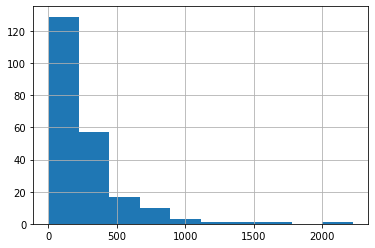

In [46]:
# create a histogram of a column (a pandas.Series object)
df['capital'].hist()

In [47]:
# look at just some outliers for capital
df.loc[df['capital']>=1000]

,invest,value,capital,firm,year
14,555.1,3700.2,1020.1,General Motors,1949.0
15,642.9,3755.6,1099.0,General Motors,1950.0
16,755.9,4833.0,1207.7,General Motors,1951.0
17,891.2,4924.9,1430.5,General Motors,1952.0
18,1304.4,6241.7,1777.3,General Motors,1953.0
19,1486.7,5593.6,2226.3,General Motors,1954.0


In [48]:
# set them equal to something else:
df.loc[df['capital']>=1000,'capital'] = 1000

<AxesSubplot:>

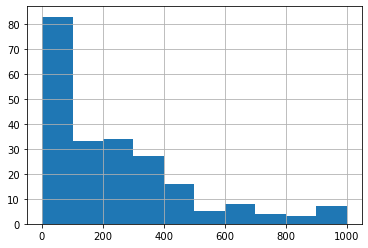

In [50]:
df['capital'].hist()

In [54]:
# drop all of the observations concerning General Motors
df_gm = df.loc[df['firm']=='General Motors']
df_gm

,invest,value,capital,firm,year
0,317.6,3078.5,2.8,General Motors,1935.0
1,391.8,4661.7,52.6,General Motors,1936.0
2,410.6,5387.1,156.9,General Motors,1937.0
3,257.7,2792.2,209.2,General Motors,1938.0
4,330.8,4313.2,203.4,General Motors,1939.0
5,461.2,4643.9,207.2,General Motors,1940.0
6,512.0,4551.2,255.2,General Motors,1941.0
7,448.0,3244.1,303.7,General Motors,1942.0
8,499.6,4053.7,264.1,General Motors,1943.0
9,547.5,4379.3,201.6,General Motors,1944.0


In [52]:
df_not_gm = df.loc[df['firm']!='General Motors']

In [53]:
# merge the gm observations back into the dataset
df = pd.concat([df_not_gm,df_gm])

In [55]:
# create a new column of data
df['new_column'] = df['capital'] + df['invest']

In [56]:
df['new_column']

20     263.7
21     405.8
22     588.0
23     522.5
24     543.1
       ...  
15    1642.9
16    1755.9
17    1891.2
18    2304.4
19    2486.7
Name: new_column, Length: 220, dtype: float64

In [61]:
df.loc[(df['invest']>=100) & (df['capital']<=800)]  # check joint condition

,invest,value,capital,firm,year,new_column
20,209.90,1362.4,53.8,US Steel,1935.0,263.70
21,355.30,1807.1,50.5,US Steel,1936.0,405.80
22,469.90,2676.3,118.1,US Steel,1937.0,588.00
23,262.30,1801.9,260.2,US Steel,1938.0,522.50
24,230.40,1957.3,312.7,US Steel,1939.0,543.10
25,361.60,2202.9,254.2,US Steel,1940.0,615.80
26,472.80,2380.5,261.4,US Steel,1941.0,734.20
27,445.60,2168.6,298.7,US Steel,1942.0,744.30
28,361.60,1985.1,301.8,US Steel,1943.0,663.40
29,288.20,1813.9,279.1,US Steel,1944.0,567.30
